# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
import seaborn as sns
from nltk.stem.wordnet import WordNetLemmatizer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


In [2]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  
0  Super light and efficient laptop.  Crisp & cle...          5.0  
1  so far I am loving the new look and the feel o...          5.0  
2  Great build quality \ excellent screen \ very ...          5.0  
3  Excellent laptop for work. Processor was able ...          5.0  
4  So far so good, I like it has an HDMI, USB-C &...          5.0

In [3]:
reviews.shape

(325, 3)

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     325 non-null    object 
 1   reviewBody   325 non-null    object 
 2   ratingValue  319 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


In [5]:
# Check for null values

reviews.isnull().sum()

headline       0
reviewBody     0
ratingValue    6
dtype: int64

In [6]:
# Check for duplicates

reviews[reviews.duplicated()]

headline  \
305                                       Great Device   
306                                       Great Laptop   
307                                       Great Device   
308                                       Great Laptop   
309                                       Great Device   
310                                       Great Laptop   
311                                       Great Device   
312                                       Great Laptop   
313                                       Great Device   
314                                       Great Laptop   
315                                       Great Device   
316                                       Great Laptop   
317                                       Great Device   
318                                       Great Laptop   
320  Dell Latitude 7440 Ultralight Review: A solid ...   
321  Dell Latitude 7440 Ultralight Review: A solid ...   
322  Dell Latitude 7440 Ultralight Review: A solid ...   
323  Dell Latitude 7440 Ultralight Review: A solid ...   
324  Dell Latitude 7440 Ultralight Review: A solid ...   

                                            reviewBody  ratingValue  
305  Great device, the 32GB of RAM makes a big diff...          5.0  
306  Been a Dell user for over 20 years, and their ...          5.0  
307  Great device, the 32GB of RAM makes a big diff...          5.0  
308  Been a Dell user for over 20 years, and their ...          5.0  
309  Great device, the 32GB of RAM makes a big diff...          5.0  
310  Been a Dell user for over 20 years, and their ...          5.0  
311  Great device, the 32GB of RAM makes a big diff...          5.0  
312  Been a Dell user for over 20 years, and their ...          5.0  
313  Great device, the 32GB of RAM makes a big diff...          5.0  
314  Been a Dell user for over 20 years, and their ...          5.0  
315  Great device, the 32GB of RAM makes a big diff...          5.0  
316  Been a Dell user for over 20 years, and their ...          5.0  
317  Great device, the 32GB of RAM makes a big diff...          5.0  
318  Been a Dell user for over 20 years, and their ...          5.0  
320  Dell's Latitude 7440 Ultralight 2-in-1 impress...          NaN  
321  Dell's Latitude 7440 Ultralight 2-in-1 impress...          NaN  
322  Dell's Latitude 7440 Ultralight 2-in-1 impress...          NaN  
323  Dell's Latitude 7440 Ultralight 2-in-1 impress...          NaN  
324  Dell's Latitude 7440 Ultralight 2-in-1 impress...          NaN

In [7]:
# Drop duplicates

reviews = reviews.drop_duplicates()

In [8]:
reviews[reviews.duplicated()]

Empty DataFrame
Columns: [headline, reviewBody, ratingValue]
Index: []

In [9]:
reviews.isnull().sum()

headline       0
reviewBody     0
ratingValue    1
dtype: int64

In [10]:
reviews[reviews['ratingValue'].isnull()]

headline  \
319  Dell Latitude 7440 Ultralight Review: A solid ...   

                                            reviewBody  ratingValue  
319  Dell's Latitude 7440 Ultralight 2-in-1 impress...          NaN

In [11]:
mean_rating = float(round(reviews['ratingValue'].mean()))
mean_rating

4.0

In [12]:
reviews['ratingValue'].fillna(value = mean_rating, inplace = True)

In [13]:
reviews.isnull().sum()

headline       0
reviewBody     0
ratingValue    0
dtype: int64

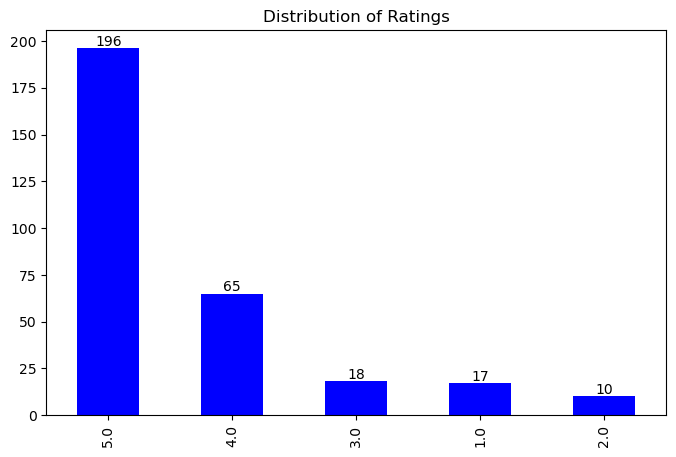

In [14]:
plt.figure(figsize = (8,5))
ax = reviews['ratingValue'].value_counts().plot(kind = 'bar', color = 'blue')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Ratings');

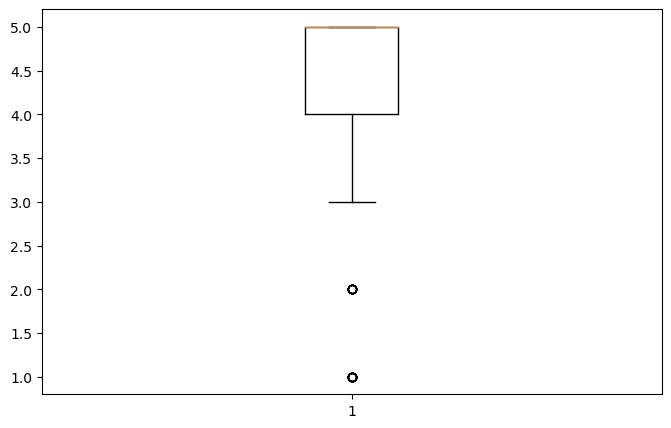

In [15]:
plt.figure(figsize = (8,5))
plt.boxplot(reviews['ratingValue']);

## Data Preprocessing

In [16]:
reviews.head()

headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  
0  Super light and efficient laptop.  Crisp & cle...          5.0  
1  so far I am loving the new look and the feel o...          5.0  
2  Great build quality \ excellent screen \ very ...          5.0  
3  Excellent laptop for work. Processor was able ...          5.0  
4  So far so good, I like it has an HDMI, USB-C &...          5.0

In [17]:
reviews['reviewBody'].iloc[0]

'Super light and efficient laptop.  Crisp & clean screen and easier to handle. Very fast execution of apps and programs'

In [18]:
import re

In [19]:
# Function to clean the text data

def data_clean(text):    
    text = text.lower()    
    text = re.sub(r'\@w+|\#', '', text)    # to remove '@' and '#' symbols
    text = re.sub(r'[^\w\s]', '', text)    # check for alphanumeric characters and whitespaces
    return text

In [20]:
reviews['clean_text'] = reviews['reviewBody'].apply(data_clean)

In [21]:
reviews.head()

headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  \
0  Super light and efficient laptop.  Crisp & cle...          5.0   
1  so far I am loving the new look and the feel o...          5.0   
2  Great build quality \ excellent screen \ very ...          5.0   
3  Excellent laptop for work. Processor was able ...          5.0   
4  So far so good, I like it has an HDMI, USB-C &...          5.0   

                                          clean_text  
0  super light and efficient laptop  crisp  clean...  
1  so far i am loving the new look and the feel o...  
2  great build quality  excellent screen  very go...  
3  excellent laptop for work processor was able t...  
4  so far so good i like it has an hdmi usbc  a p...

In [22]:
# Now we'll tokenize the data and remove stopwords from it.

In [23]:
import nltk

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
from nltk.corpus import stopwords

In [26]:
# Function to tokenize and remove the stopswords from the data

def tokenize(text):
    text_tokens = word_tokenize(text)
    tokenize_text = [i for i in text_tokens if not i in stopwords.words('english')]
    return tokenize_text

In [27]:
reviews['tokenize_text'] = reviews['clean_text'].apply(tokenize)

In [28]:
reviews.head()

headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  \
0  Super light and efficient laptop.  Crisp & cle...          5.0   
1  so far I am loving the new look and the feel o...          5.0   
2  Great build quality \ excellent screen \ very ...          5.0   
3  Excellent laptop for work. Processor was able ...          5.0   
4  So far so good, I like it has an HDMI, USB-C &...          5.0   

                                          clean_text  \
0  super light and efficient laptop  crisp  clean...   
1  so far i am loving the new look and the feel o...   
2  great build quality  excellent screen  very go...   
3  excellent laptop for work processor was able t...   
4  so far so good i like it has an hdmi usbc  a p...   

                                       tokenize_text  
0  [super, light, efficient, laptop, crisp, clean...  
1        [far, loving, new, look, feel, new, laptop]  
2  [great, build, quality, excellent, screen, goo...  
3  [excellent, laptop, work, processor, able, han...  
4  [far, good, like, hdmi, usbc, ports, instead, ...

In [29]:
reviews['tokenize_text'][0]

['super',
 'light',
 'efficient',
 'laptop',
 'crisp',
 'clean',
 'screen',
 'easier',
 'handle',
 'fast',
 'execution',
 'apps',
 'programs']

In [30]:
# Applying lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    text = [lemmatizer.lemmatize(i) for i in text]
    return ' '.join(text)

In [33]:
reviews['tokenize_text'] = reviews['tokenize_text'].apply(lemmatize)

In [34]:
reviews.head()

headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  \
0  Super light and efficient laptop.  Crisp & cle...          5.0   
1  so far I am loving the new look and the feel o...          5.0   
2  Great build quality \ excellent screen \ very ...          5.0   
3  Excellent laptop for work. Processor was able ...          5.0   
4  So far so good, I like it has an HDMI, USB-C &...          5.0   

                                          clean_text  \
0  super light and efficient laptop  crisp  clean...   
1  so far i am loving the new look and the feel o...   
2  great build quality  excellent screen  very go...   
3  excellent laptop for work processor was able t...   
4  so far so good i like it has an hdmi usbc  a p...   

                                       tokenize_text  
0  super light efficient laptop crisp clean scree...  
1                far loving new look feel new laptop  
2  great build quality excellent screen good port...  
3  excellent laptop work processor able handle wo...  
4  far good like hdmi usbc port instead usbc port...

In [35]:
reviews['tokenize_text'][0]

'super light efficient laptop crisp clean screen easier handle fast execution apps program'

In [36]:
# import textblob to check polarity

In [37]:
from textblob import TextBlob

In [38]:

TextBlob('super light efficient laptop crisp clean screen easier handle fast execution apps program').sentiment[0]

0.31

In [39]:
# Function to calculate polarity

def tb_polarity(text):
    polarity = TextBlob(text).sentiment[0]
    return polarity

In [40]:
reviews['tb_polarity'] = reviews['tokenize_text'].apply(tb_polarity)

In [41]:
reviews.head()

headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  \
0  Super light and efficient laptop.  Crisp & cle...          5.0   
1  so far I am loving the new look and the feel o...          5.0   
2  Great build quality \ excellent screen \ very ...          5.0   
3  Excellent laptop for work. Processor was able ...          5.0   
4  So far so good, I like it has an HDMI, USB-C &...          5.0   

                                          clean_text  \
0  super light and efficient laptop  crisp  clean...   
1  so far i am loving the new look and the feel o...   
2  great build quality  excellent screen  very go...   
3  excellent laptop for work processor was able t...   
4  so far so good i like it has an hdmi usbc  a p...   

                                       tokenize_text  tb_polarity  
0  super light efficient laptop crisp clean scree...     0.310000  
1                far loving new look feel new laptop     0.243182  
2  great build quality excellent screen good port...     0.600000  
3  excellent laptop work processor able handle wo...     0.500000  
4  far good like hdmi usbc port instead usbc port...     0.435000

In [42]:
def sentiments(num):
    if num > 0:
        return 'Positive'
    elif num < 0:
        return 'Negative'
    elif num == 0:
        return 'Neutral'

In [43]:
reviews['Sentiments'] = reviews['tb_polarity'].apply(sentiments)

In [44]:
reviews.head()

headline  \
0  Super light and efficient laptop   
1               NEW laptop is great   
2           Lightweight powerhouse.   
3             Great Laptop for Work   
4            Practical Solid Laptop   

                                          reviewBody  ratingValue  \
0  Super light and efficient laptop.  Crisp & cle...          5.0   
1  so far I am loving the new look and the feel o...          5.0   
2  Great build quality \ excellent screen \ very ...          5.0   
3  Excellent laptop for work. Processor was able ...          5.0   
4  So far so good, I like it has an HDMI, USB-C &...          5.0   

                                          clean_text  \
0  super light and efficient laptop  crisp  clean...   
1  so far i am loving the new look and the feel o...   
2  great build quality  excellent screen  very go...   
3  excellent laptop for work processor was able t...   
4  so far so good i like it has an hdmi usbc  a p...   

                                       tokenize_text  tb_polarity Sentiments  
0  super light efficient laptop crisp clean scree...     0.310000   Positive  
1                far loving new look feel new laptop     0.243182   Positive  
2  great build quality excellent screen good port...     0.600000   Positive  
3  excellent laptop work processor able handle wo...     0.500000   Positive  
4  far good like hdmi usbc port instead usbc port...     0.435000   Positive

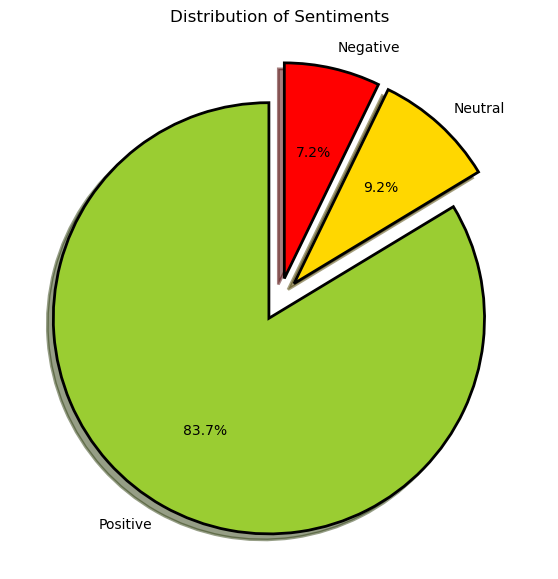

In [45]:
plt.figure(figsize = (7,7))

colors = ("yellowgreen", "gold", "red")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = reviews['Sentiments'].value_counts()
explode = (0.1,0.1,0.1)

tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp, explode = explode, label = '')
plt.title('Distribution of Sentiments');

In [46]:
from wordcloud import WordCloud

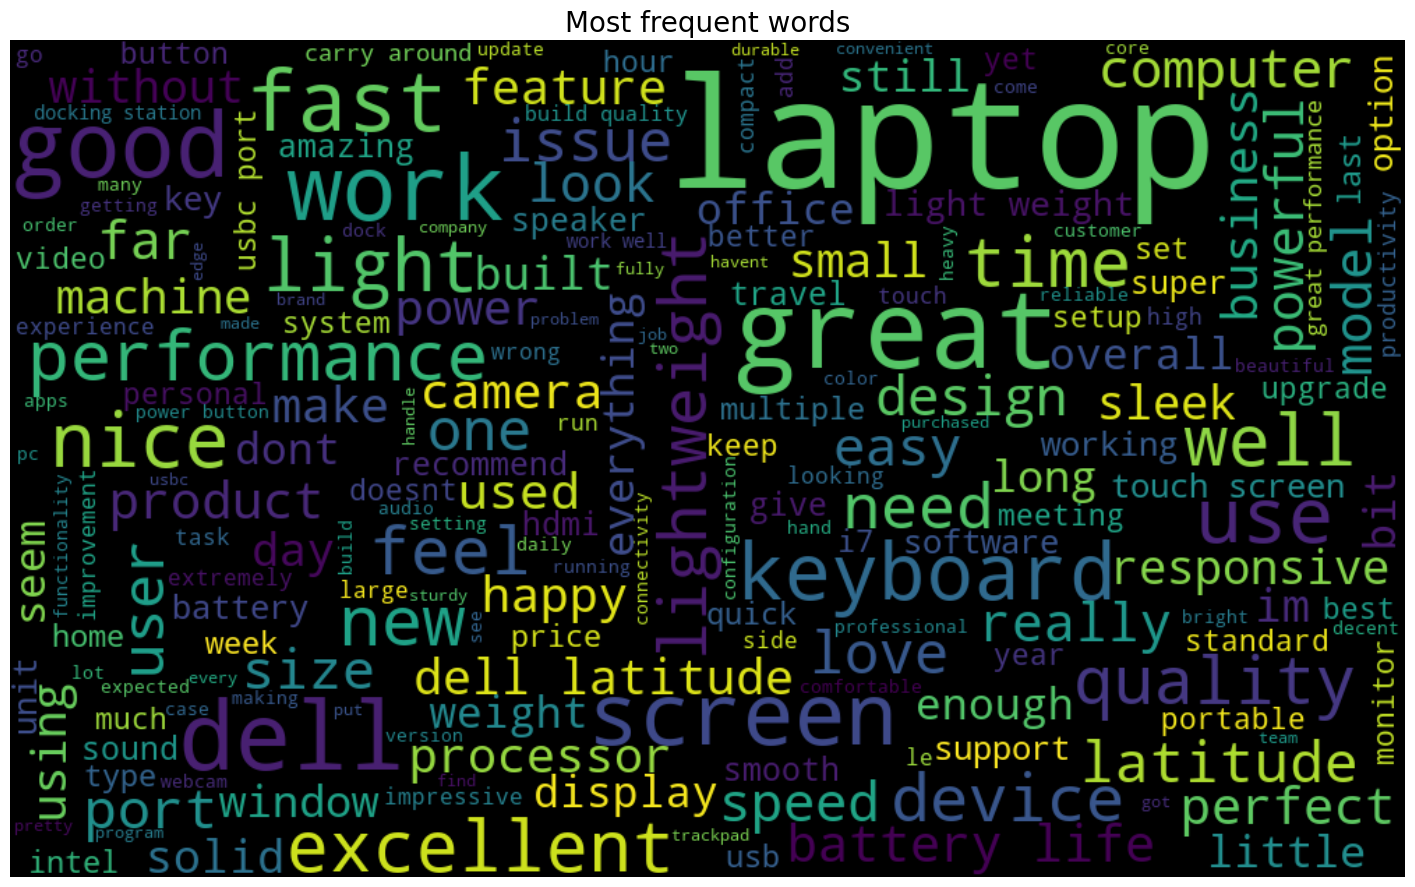

In [47]:
wordcloud = WordCloud(width = 1000, height = 600, random_state = 42, max_font_size = 110).generate(' '.join(x for x in reviews['tokenize_text']))

plt.figure(figsize = (18, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Most frequent words', fontsize = 20)
plt.axis('off');

In [48]:
pos_reviews = reviews[reviews['Sentiments'] == 'Positive']

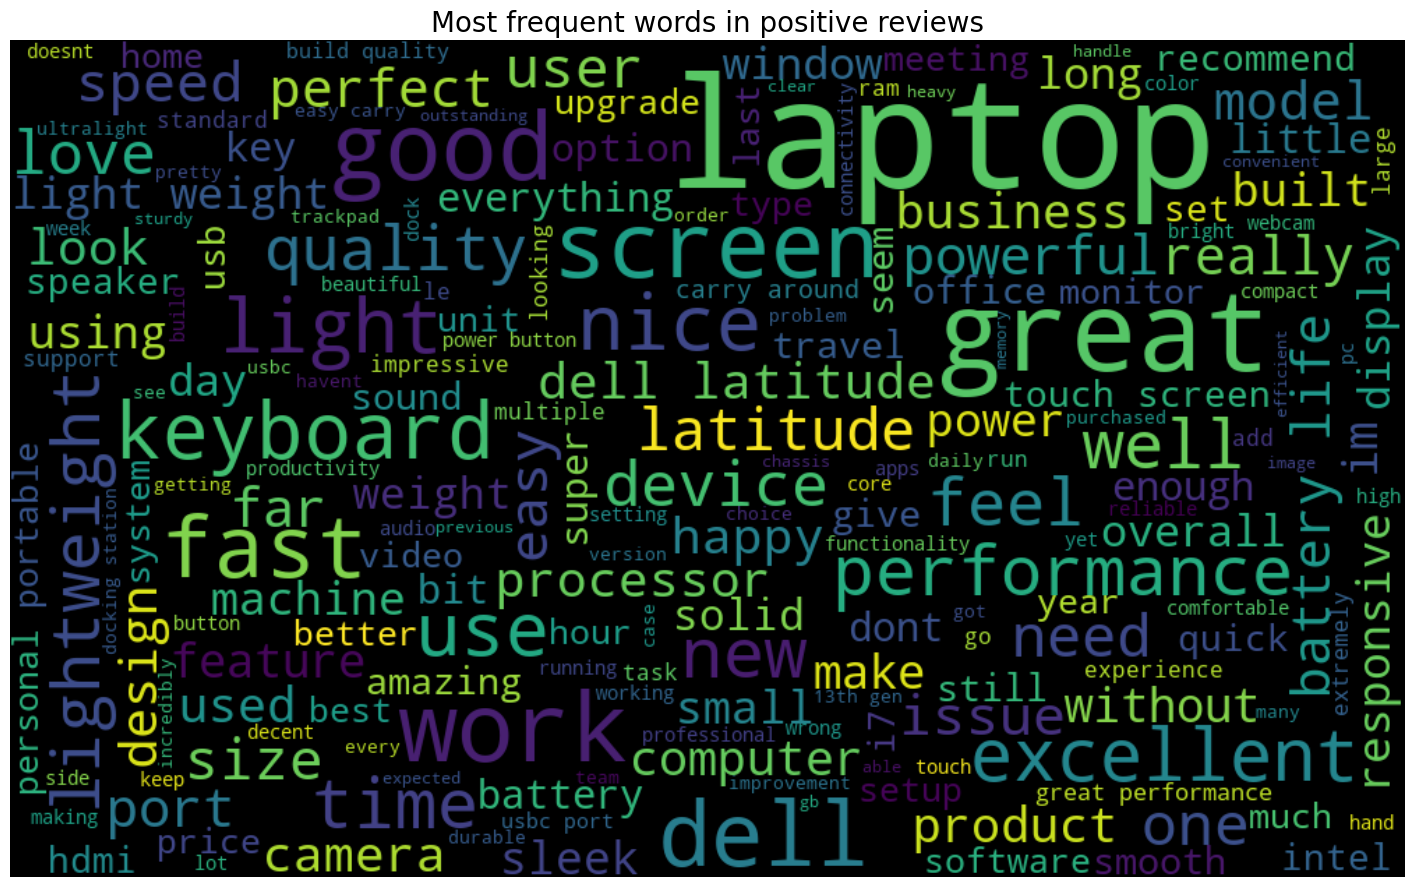

In [49]:
wordcloud = WordCloud(width = 1000, height = 600, random_state = 42, max_font_size = 110).generate(' '.join(x for x in pos_reviews['tokenize_text']))

plt.figure(figsize = (18, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Most frequent words in positive reviews', fontsize = 20)
plt.axis('off');

In [50]:
neg_reviews = reviews[reviews['Sentiments'] == 'Negative']

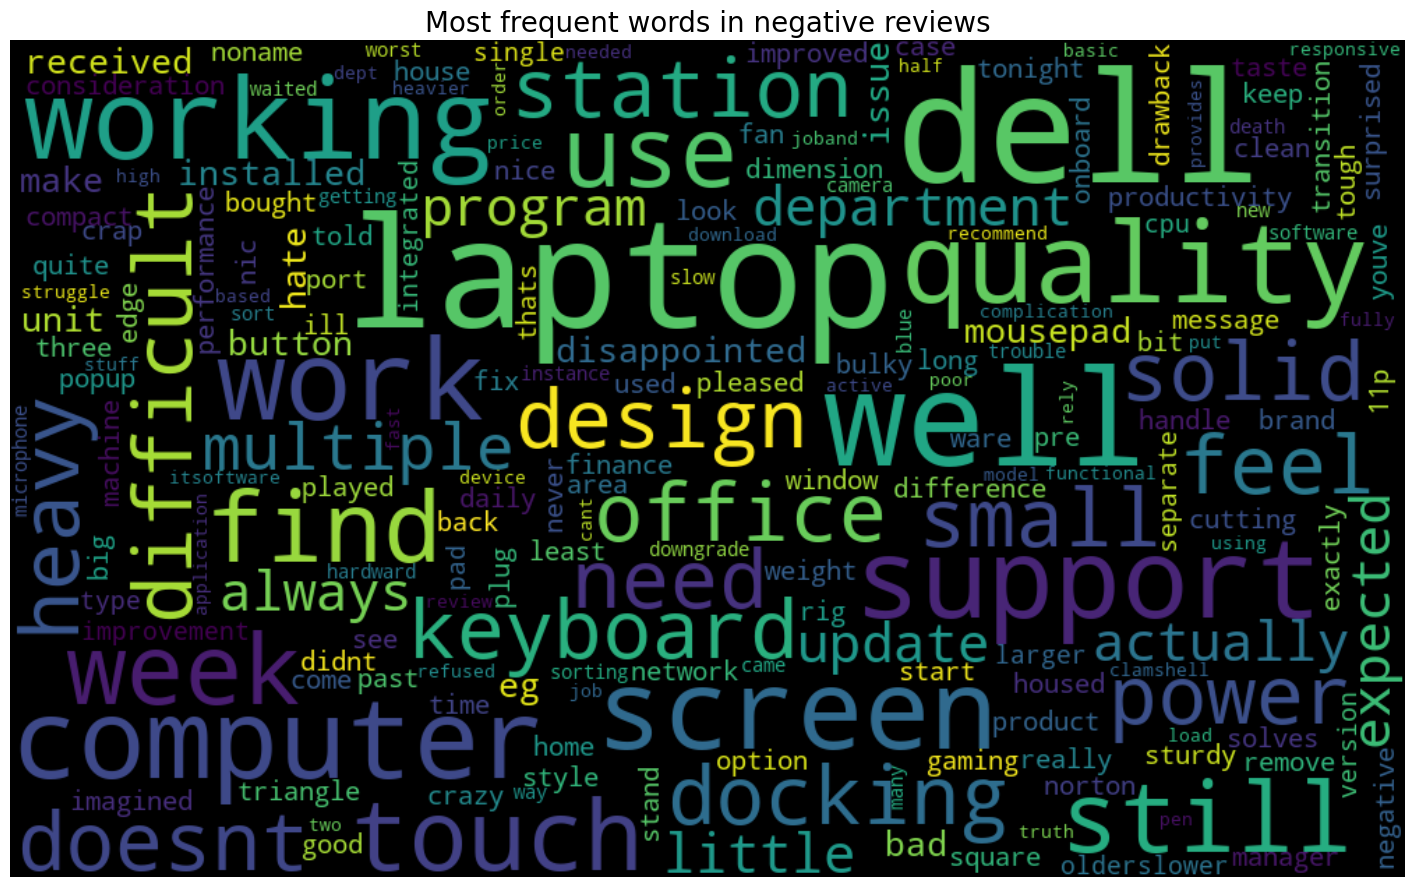

In [51]:
wordcloud = WordCloud(width = 1000, height = 600, random_state = 42, max_font_size = 110).generate(' '.join(x for x in neg_reviews['tokenize_text']))

plt.figure(figsize = (18, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Most frequent words in negative reviews', fontsize = 20)
plt.axis('off');

In [52]:
neutral_reviews = reviews[reviews['Sentiments'] == 'Neutral']

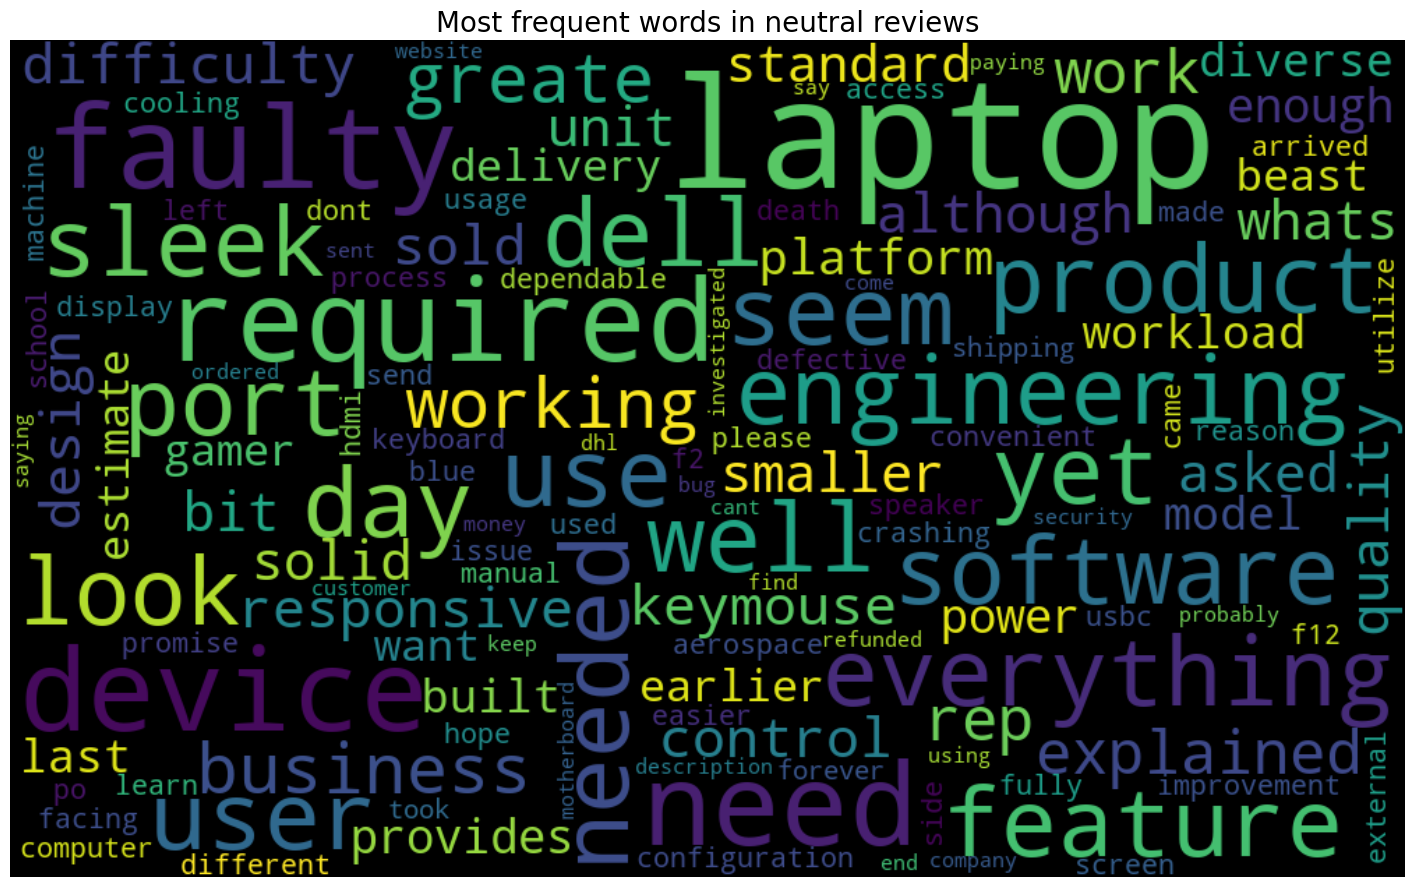

In [53]:
wordcloud = WordCloud(width = 1000, height = 600, random_state = 42, max_font_size = 110).generate(' '.join(x for x in neutral_reviews['tokenize_text']))

plt.figure(figsize = (18, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Most frequent words in neutral reviews', fontsize = 20)
plt.axis('off');

# Model Building

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfidf_vect = TfidfVectorizer()

In [56]:
vectorized_review = tfidf_vect.fit_transform(reviews['tokenize_text'])

In [57]:
# Splitting the data

In [58]:
X = vectorized_review

y = reviews['Sentiments'].map({'Negative' : 0, 'Neutral' : 1, 'Positive' : 2})

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [61]:
print('Size of X_Train:', X_Train.shape)
print('Size of y_train:', y_train.shape)
print('Size of X_Test:', X_Test.shape)
print('Size of y_test:', y_test.shape)

Size of X_Train: (229, 1651)
Size of y_train: (229,)
Size of X_Test: (77, 1651)
Size of y_test: (77,)


### Logistic Regression Model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log_reg = LogisticRegression()

In [64]:
log_reg.fit(X_Train, y_train)

LogisticRegression()

In [65]:
predict = log_reg.predict(X_Test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy = accuracy_score(predict, y_test)

In [68]:
print("Test Accuracy: {:.2f}%".format(accuracy*100))

Test Accuracy: 85.71%


In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
cm = confusion_matrix(y_test, predict)
cm

array([[ 0,  0,  5],
       [ 0,  0,  6],
       [ 0,  0, 66]], dtype=int64)

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

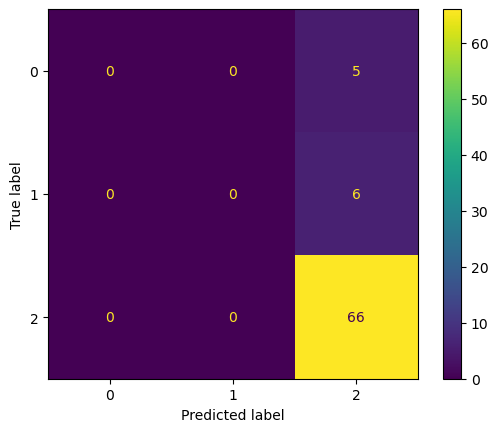

In [72]:
ConfusionMatrixDisplay(cm, display_labels = log_reg.classes_).plot()

In [73]:
print(classification_report(y_test, predict, zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.86      1.00      0.92        66

    accuracy                           0.86        77
   macro avg       0.29      0.33      0.31        77
weighted avg       0.73      0.86      0.79        77



### SVC Model

In [74]:
from sklearn.svm import LinearSVC

In [75]:
svc_model = LinearSVC()

In [76]:
svc_model.fit(X_Train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [77]:
pred = svc_model.predict(X_Test)

In [78]:
svc_accuracy = accuracy_score(pred, y_test)

In [79]:
print('Test Accuracy: {:.2f}%'.format(svc_accuracy*100))

Test Accuracy: 85.71%


In [80]:
confusion_matrix(y_test, pred)

array([[ 0,  0,  5],
       [ 0,  0,  6],
       [ 0,  0, 66]], dtype=int64)

In [81]:
print(classification_report(y_test, pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.86      1.00      0.92        66

    accuracy                           0.86        77
   macro avg       0.29      0.33      0.31        77
weighted avg       0.73      0.86      0.79        77



### Import GridSearchCV for hyperparameter tunning

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}

In [84]:
grid = {
         'kernel':["linear","poly","rbf","sigmoid"],
         'degree':[1,3,5,7],
         'gamma':[0.01,1]
        }

grid = GridSearchCV(svc_model, param_grid)
grid.fit(X_Train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_clas

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [85]:
grid.best_params_

{'C': 0.001}

In [86]:
y_pred = grid.predict(X_Test)

In [87]:
print('Test Accuracy: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

Test Accuracy: 85.71%


In [88]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  5],
       [ 0,  0,  6],
       [ 0,  0, 66]], dtype=int64)

In [89]:
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.86      1.00      0.92        66

    accuracy                           0.86        77
   macro avg       0.29      0.33      0.31        77
weighted avg       0.73      0.86      0.79        77



### KNN Model

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn_c = KNeighborsClassifier(n_neighbors = 10)

In [92]:
knn_c.fit(X_Train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [93]:
y_pred_knn = knn_c.predict(X_Test)

In [94]:
print('Test Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_knn)*100))

Test Accuracy: 85.71%


In [95]:
confusion_matrix(y_test, y_pred_knn)

array([[ 0,  0,  5],
       [ 0,  0,  6],
       [ 0,  0, 66]], dtype=int64)

In [96]:
print(classification_report(y_test, y_pred_knn, zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.86      1.00      0.92        66

    accuracy                           0.86        77
   macro avg       0.29      0.33      0.31        77
weighted avg       0.73      0.86      0.79        77



### GridSearchCV for hyperparameter tunning

In [97]:
n_neighbours = np.array(range(1,20))

In [98]:
dict1 = dict(n_neighbors = n_neighbours)

In [99]:
grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = dict1, cv = 12, n_jobs = -1)

In [100]:
grid_knn.fit(X_Train, y_train)

GridSearchCV(cv=12, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [101]:
grid_knn.best_params_

{'n_neighbors': 6}

In [102]:
y_pred_knn_grid = grid_knn.predict(X_Test)

In [103]:
print('Test Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_knn_grid)*100))

Test Accuracy: 81.82%


In [104]:
confusion_matrix(y_test, y_pred_knn_grid)

array([[ 0,  0,  5],
       [ 0,  0,  6],
       [ 0,  3, 63]], dtype=int64)

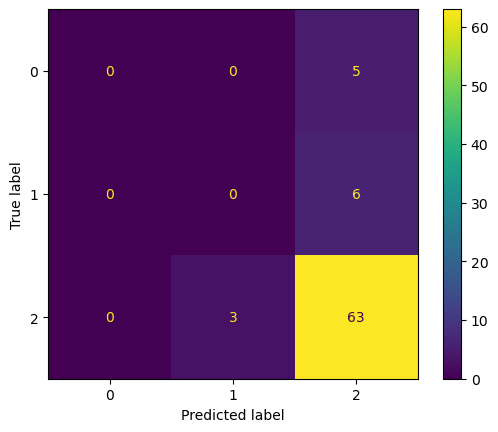

In [105]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn_grid), display_labels = grid_knn.classes_).plot()

In [106]:
print(classification_report(y_test, y_pred_knn_grid, zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.85      0.95      0.90        66

    accuracy                           0.82        77
   macro avg       0.28      0.32      0.30        77
weighted avg       0.73      0.82      0.77        77



### XGBoost Model

In [107]:
from xgboost import XGBClassifier

In [108]:
xgb = XGBClassifier()

In [109]:
xgb.fit(X_Train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [110]:
y_pred_xgb = xgb.predict(X_Test)

In [111]:
print('Test accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_xgb)*100))

Test accuracy: 87.01%


### Hyperparameter Tunning

In [112]:
parameters = {
               'n_estimators' : [20, 30, 50, 60, 100],
               'learning_rate' : [0.01, 0.1, 0.3, 1],
               'gama' : [0.01, 1],
               'max_depth' : [2, 6, 10, 20]
              }

In [113]:
grid_xgb = GridSearchCV(estimator = xgb, param_grid = parameters, cv = 10, n_jobs = -1)

In [114]:
grid_xgb.fit(X_Train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'gama': [0.01, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 1],
                         'max_depth': [2, 6, 10, 20],
                         'n_estimators': [20, 30, 50, 60, 100]})

In [115]:
grid_xgb.best_params_

{'gama': 0.01, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}

In [116]:
y_pred_xgb_grid = grid_xgb.predict(X_Test)

In [117]:
print('Test accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_xgb_grid)*100))

Test accuracy: 85.71%


In [118]:
data = {
        'Models' : ['Logistic Regression', 'LinearSVC', 'LinearSVC_GridCV', 'KNN', 'KNN_Grid', 'XGBoost', 'XGBOost_Grid'],
        
        'Accuracy' : ['{:.2f}%'.format(accuracy*100), '{:.2f}%'.format(svc_accuracy*100), '{:.2f}%'.format(accuracy_score(y_pred, y_test)*100), '{:.2f}%'.format(accuracy_score(y_test, y_pred_knn)*100), '{:.2f}%'.format(accuracy_score(y_test, y_pred_knn_grid)*100), '{:.2f}%'.format(accuracy_score(y_test, y_pred_xgb)*100), '{:.2f}%'.format(accuracy_score(y_test, y_pred_xgb_grid)*100)]
       }


In [119]:
models_score = pd.DataFrame(data)

In [120]:
models_score

Models Accuracy
0  Logistic Regression   85.71%
1            LinearSVC   85.71%
2     LinearSVC_GridCV   85.71%
3                  KNN   85.71%
4             KNN_Grid   81.82%
5              XGBoost   87.01%
6         XGBOost_Grid   85.71%

In [ ]:
# %load AppNLP.py
import pandas as pd
import numpy as np
import streamlit as st
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob


# Function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text


# Function to tokenize the text and remove stop words
def tokenize(text):
    text_tokens = word_tokenize(text)
    tokenize_text = [i for i in text_tokens if i not in stopwords.words('english')]
    return tokenize_text


# Function to lemmatize the text
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatize_text = [lemmatizer.lemmatize(i) for i in text]
    return ' '.join(lemmatize_text)


def main():
    st.title('Sentiment Analysis WebApp')

    # User input for text
    text = st.text_area('Enter the text')

    # Analyze the sentiment
    if st.button('Analyze the sentiment'):
        if len(text) > 0:
            cleaned_text = clean_text(text)

            tokenized_text = tokenize(cleaned_text)

            lemmatized_text = lemmatize(tokenized_text)

            text_blob = TextBlob(lemmatized_text)

            tb_polarity = text_blob.sentiment[0]

            if tb_polarity > 0:
                st.success('The entered text has positive sentiments.')
                st.success('Polarity = {:.2f}'.format(tb_polarity))
            elif tb_polarity < 0:
                st.error('The entered text has negative sentiments.')
                st.error('Polarity = {:.2f}'.format(tb_polarity))
            elif tb_polarity == 0:
                st.warning('The entered text has neutral sentiments.')
                st.warning('Polarity = {:.2f}'.format(tb_polarity))
        else:
            st.write('Please enter the text.')


if __name__ == '__main__':
    main()


In [124]:
%run AppNLP.py